In [261]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt
import scipy

X = pd.read_csv('newluminex.csv', sep = ',', header = 0);
Y = pd.read_csv('newfunction.csv', sep = ',', header = 0);
Class = pd.read_csv('subjects.csv', sep = ',', header = 0);
Xigg = pd.read_csv('newluminex-igg.csv', sep = ',', header = 0);
Yigg = pd.read_csv('newIGgfunction.csv', sep = ',', header = 0);

Xdata = X.to_numpy();
Ydata = Y.to_numpy();
Classdata = Class.to_numpy();
Xiggdata = Xigg.to_numpy();
Yiggdata = Yigg.to_numpy();

Xuse = Xdata[:, 1:];
Yuse = Ydata[:, 1:];
Xigguse = Xiggdata[:, 1:];
Yigguse = Yiggdata[:, 1:];

for i in range(491):
    Xuse[:, i] = scipy.stats.zscore(Xuse[:, i]);

    
for i in range(26):
    Xigguse[:, i] = scipy.stats.zscore(Xigguse[:, i]);
    

Models built with full FC array data
Run very slowly, prints loop number to track progress

In [265]:
alphas = np.empty(100); # rerun

for i in range(100):
    print(i);
    model = sklearn.linear_model.ElasticNetCV(l1_ratio=0.8, cv=10, selection = 'random', max_iter = 2000);
    model.fit(Xuse, Yuse[:, 0]);
    alphas[i] = model.alpha_;

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [266]:
ADCDcorrcoefs = np.empty(100); # rerun

for i in range(100):
    print(i)
    ADCDpred = np.empty(174)
    model2 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = alphas[i]);
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xuse):
        model2.fit(Xuse[train, :], Yuse[train, 0].reshape(-1,1));
        ADCDpred[test] = model2.predict(Xuse[test, :]);
    ADCDcorrcoefs[i] = np.corrcoef(ADCDpred, Yuse[:, 0])[1, 0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [79]:
alphas2 = np.empty(100);

for i in range(100):
    print(i)
    model = sklearn.linear_model.ElasticNetCV(l1_ratio=0.8, cv=10, selection = 'random');
    model.fit(Xuse, Yuse[:, 1]);
    alphas2[i] = model.alpha_;

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [80]:
ADCCcorrcoefs = np.empty(100);

for i in range(100):
    print(i)
    ADCCpred = np.empty(174)
    model2 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = alphas2[i]);
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xuse):
        model2.fit(Xuse[train, :], Yuse[train, 1].reshape(-1,1));
        ADCCpred[test] = model2.predict(Xuse[test, :]);
    ADCCcorrcoefs[i] = np.corrcoef(ADCCpred, Yuse[:, 1])[1, 0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [81]:
print(np.mean(ADCCcorrcoefs));
print(np.std(ADCCcorrcoefs));

0.7212270622181377
2.220446049250313e-16


In [82]:
alphas3 = np.empty(100);

for i in range(100):
    print(i)
    model = sklearn.linear_model.ElasticNetCV(l1_ratio=0.8, cv=10, selection = 'random');
    model.fit(Xuse, Yuse[:, 2]);
    alphas3[i] = model.alpha_;

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [83]:
ADNPcorrcoefs = np.empty(100);

for i in range(100):
    print(i)
    ADNPpred = np.empty(174)
    model2 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = alphas3[i]);
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xuse):
        model2.fit(Xuse[train, :], Yuse[train, 2].reshape(-1,1));
        ADNPpred[test] = model2.predict(Xuse[test, :]);
    ADNPcorrcoefs[i] = np.corrcoef(ADNPpred, Yuse[:, 2])[1, 0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [84]:
print(np.mean(ADNPcorrcoefs));
print(np.std(ADNPcorrcoefs));

0.5743114010718811
1.1102230246251565e-16


In [85]:
alphas4 = np.empty(100);

for i in range(100):
    print(i)
    model = sklearn.linear_model.ElasticNetCV(l1_ratio=0.8, cv=10, selection = 'random');
    model.fit(Xuse, Yuse[:, 3]);
    alphas4[i] = model.alpha_;

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [86]:
CD107acorrcoefs = np.empty(100);

for i in range(100):
    print(i)
    CD107apred = np.empty(174)
    model2 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = alphas4[i]);
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xuse):
        model2.fit(Xuse[train, :], Yuse[train, 3].reshape(-1,1));
        CD107apred[test] = model2.predict(Xuse[test, :]);
    CD107acorrcoefs[i] = np.corrcoef(CD107apred, Yuse[:, 3])[1, 0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [87]:
print(np.mean(CD107acorrcoefs));
print(np.std(CD107acorrcoefs));

0.6245466931196395
0.0


In [88]:
alphas5 = np.empty(100);

for i in range(100):
    print(i)
    model = sklearn.linear_model.ElasticNetCV(l1_ratio=0.8, cv=10, selection = 'random');
    model.fit(Xuse, Yuse[:, 4]);
    alphas5[i] = model.alpha_;

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [89]:
IFNycorrcoefs = np.empty(100);

for i in range(100):
    print(i)
    IFNypred = np.empty(174)
    model2 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = alphas5[i]);
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xuse):
        model2.fit(Xuse[train, :], Yuse[train, 4].reshape(-1,1));
        IFNypred[test] = model2.predict(Xuse[test, :]);
    IFNycorrcoefs[i] = np.corrcoef(IFNypred, Yuse[:, 4])[1, 0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [321]:
representativeIFNy = alphas5[np.argmin(np.abs(np.median(IFNycorrcoefs) - IFNycorrcoefs))];

IFNypredrep = np.empty(174)
model2 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = representativeIFNy);
cv = sklearn.model_selection.LeaveOneOut();
for train, test in cv.split(Xuse):
    model2.fit(Xuse[train, :], Yuse[train, 4].reshape(-1,1));
    IFNypredrep[test] = model2.predict(Xuse[test, :]);

In [90]:
print(np.mean(IFNycorrcoefs));
print(np.std(IFNycorrcoefs));

0.6899623133722105
0.0007624776009941699


In [91]:
alphas6 = np.empty(100);

for i in range(100):
    print(i)
    model = sklearn.linear_model.ElasticNetCV(l1_ratio=0.8, cv=10, selection = 'random');
    model.fit(Xuse, Yuse[:, 5]);
    alphas6[i] = model.alpha_;

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [92]:
MIP1bcorrcoefs = np.empty(100);

for i in range(100):
    print(i)
    MIP1bpred = np.empty(174)
    model2 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = alphas6[i]);
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xuse):
        model2.fit(Xuse[train, :], Yuse[train, 5].reshape(-1,1));
        MIP1bpred[test] = model2.predict(Xuse[test, :]);
    MIP1bcorrcoefs[i] = np.corrcoef(MIP1bpred, Yuse[:, 5])[1, 0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


Models built with only IGg Subclassing Data

In [214]:
alphasigg = np.empty(100);

for i in range(100):
    model = sklearn.linear_model.ElasticNetCV(l1_ratio=0.8, cv=10, selection = 'random');
    model.fit(Xigguse, Yigguse[:, 0]);
    alphasigg[i] = model.alpha_;

In [215]:
ADCDiggccs = np.empty(100);

for i in range(100):
    ADCDiggpred = np.empty(174)
    model2 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = alphasigg[i]);
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xigguse):
        model2.fit(Xigguse[train, :], Yigguse[train, 0].reshape(-1,1));
        ADCDiggpred[test] = model2.predict(Xigguse[test, :]);
    ADCDiggccs[i] = np.corrcoef(ADCDiggpred, Yigguse[:, 0])[1, 0];

In [217]:
alphasigg2 = np.empty(100);

for i in range(100):
    model = sklearn.linear_model.ElasticNetCV(l1_ratio=0.8, cv=10, selection = 'random');
    model.fit(Xigguse, Yigguse[:, 1]);
    alphasigg2[i] = model.alpha_;

In [218]:
ADCCiggccs = np.empty(100);

for i in range(100):
    ADCCiggpred = np.empty(174)
    model2 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = alphasigg2[i]);
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xigguse):
        model2.fit(Xigguse[train, :], Yigguse[train, 1].reshape(-1,1));
        ADCCiggpred[test] = model2.predict(Xigguse[test, :]);
    ADCCiggccs[i] = np.corrcoef(ADCCiggpred, Yigguse[:, 1])[1, 0];

In [221]:
alphasigg3 = np.empty(100);

for i in range(100):
    model = sklearn.linear_model.ElasticNetCV(l1_ratio=0.8, cv=10, selection = 'random');
    model.fit(Xigguse, Yigguse[:, 2]);
    alphasigg3[i] = model.alpha_;

In [222]:
ADNPiggccs = np.empty(100);

for i in range(100):
    ADNPiggpred = np.empty(174)
    model2 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = alphasigg3[i]);
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xigguse):
        model2.fit(Xigguse[train, :], Yigguse[train, 2].reshape(-1,1));
        ADNPiggpred[test] = model2.predict(Xigguse[test, :]);
    ADNPiggccs[i] = np.corrcoef(ADNPiggpred, Yigguse[:, 2])[1, 0];

In [224]:
alphasigg4 = np.empty(100);

for i in range(100):
    model = sklearn.linear_model.ElasticNetCV(l1_ratio=0.8, cv=10, selection = 'random');
    model.fit(Xigguse, Yigguse[:, 3]);
    alphasigg4[i] = model.alpha_;

In [225]:
CD107aiggccs = np.empty(100);

for i in range(100):
    CD107aiggpred = np.empty(174)
    model2 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = alphasigg4[i]);
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xigguse):
        model2.fit(Xigguse[train, :], Yigguse[train, 3].reshape(-1,1));
        CD107aiggpred[test] = model2.predict(Xigguse[test, :]);
    CD107aiggccs[i] = np.corrcoef(CD107aiggpred, Yigguse[:, 3])[1, 0];

In [227]:
alphasigg5 = np.empty(100);

for i in range(100):
    model = sklearn.linear_model.ElasticNetCV(l1_ratio=0.8, cv=10, selection = 'random');
    model.fit(Xigguse, Yigguse[:, 4]);
    alphasigg5[i] = model.alpha_;

In [228]:
IFNyiggccs = np.empty(100);

for i in range(100):
    IFNyiggpred = np.empty(174)
    model2 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = alphasigg5[i]);
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xigguse):
        model2.fit(Xigguse[train, :], Yigguse[train, 4].reshape(-1,1));
        IFNyiggpred[test] = model2.predict(Xigguse[test, :]);
    IFNyiggccs[i] = np.corrcoef(IFNyiggpred, Yigguse[:, 4])[1, 0];

In [230]:
alphasigg6 = np.empty(100);

for i in range(100):
    model = sklearn.linear_model.ElasticNetCV(l1_ratio=0.8, cv=10, selection = 'random');
    model.fit(Xigguse, Yigguse[:, 5]);
    alphasigg6[i] = model.alpha_;

In [231]:
MIP1biggccs = np.empty(100);

for i in range(100):
    MIP1biggpred = np.empty(174)
    model2 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = alphasigg6[i]);
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xigguse):
        model2.fit(Xigguse[train, :], Yigguse[train, 5].reshape(-1,1));
        MIP1biggpred[test] = model2.predict(Xigguse[test, :]);
    MIP1biggccs[i] = np.corrcoef(MIP1biggpred, Yigguse[:, 5])[1, 0];

Permutation Tests ...DO NOT GET THE SAME VALUES

In [297]:
ADCDpermccs = np.empty(100);

for i in range(100):
    ADCDpermpred = np.empty(174)
    model3 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = np.mean(ADCDcorrcoefs));
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xuse):
        permuted = sklearn.utils.shuffle(Yuse[:, 0])
        model3.fit(Xuse[train, :], permuted[train].reshape(-1, 1));
        ADCDpermpred[test] = model3.predict(Xuse[test, :]);
    ADCDpermccs[i] = np.corrcoef(ADCDpermpred, permuted)[1, 0];

In [308]:
ADCCpermccs = np.empty(100);

for i in range(100):
    ADCCpermpred = np.empty(174)
    model3 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = np.mean(ADCCcorrcoefs));
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xuse):
        permuted = sklearn.utils.shuffle(Yuse[:, 1])
        model3.fit(Xuse[train, :], permuted[train].reshape(-1, 1));
        ADCCpermpred[test] = model3.predict(Xuse[test, :]);
    ADCCpermccs[i] = np.corrcoef(ADCCpermpred, permuted)[1, 0];

In [310]:
ADNPpermccs = np.empty(100);

for i in range(100):
    ADNPpermpred = np.empty(174)
    model3 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = np.mean(ADNPcorrcoefs));
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xuse):
        permuted = sklearn.utils.shuffle(Yuse[:, 2])
        model3.fit(Xuse[train, :], permuted[train].reshape(-1, 1));
        ADNPpermpred[test] = model3.predict(Xuse[test, :]);
    ADNPpermccs[i] = np.corrcoef(ADNPpermpred, permuted)[1, 0];

In [312]:
CD107apermccs = np.empty(100);

for i in range(100):
    CD107apermpred = np.empty(174)
    model3 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = np.mean(CD107acorrcoefs));
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xuse):
        permuted = sklearn.utils.shuffle(Yuse[:, 3])
        model3.fit(Xuse[train, :], permuted[train].reshape(-1, 1));
        CD107apermpred[test] = model3.predict(Xuse[test, :]);
    CD107apermccs[i] = np.corrcoef(CD107apermpred, permuted)[1, 0];

In [314]:
IFNypermccs = np.empty(100);

for i in range(100):
    IFNypermpred = np.empty(174)
    model3 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = np.mean(IFNycorrcoefs));
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xuse):
        permuted = sklearn.utils.shuffle(Yuse[:, 4])
        model3.fit(Xuse[train, :], permuted[train].reshape(-1, 1));
        IFNypermpred[test] = model3.predict(Xuse[test, :]);
    IFNypermccs[i] = np.corrcoef(IFNypermpred, permuted)[1, 0];

In [316]:
MIP1bpermccs = np.empty(100);

for i in range(100):
    MIP1bpermpred = np.empty(174)
    model3 = sklearn.linear_model.ElasticNet(l1_ratio = 0.8, alpha = np.mean(MIP1bcorrcoefs));
    cv = sklearn.model_selection.LeaveOneOut();
    for train, test in cv.split(Xuse):
        permuted = sklearn.utils.shuffle(Yuse[:, 5])
        model3.fit(Xuse[train, :], permuted[train].reshape(-1, 1));
        MIP1bpermpred[test] = model3.predict(Xuse[test, :]);
    MIP1bpermccs[i] = np.corrcoef(MIP1bpermpred, permuted)[1, 0];

Figure 5A - Correlation coefficients for models built with the full fc array (green), only the IGg subclassing data (gray)... ERROR BARS MUCH SMALLER THAN PAPER, CANNOT FIND BIOLOGICAL REPLICATES DATA (paper says it reported averages, placed on figure by approximation), PERMUTED DATA DIFFERENT FROM PAPER

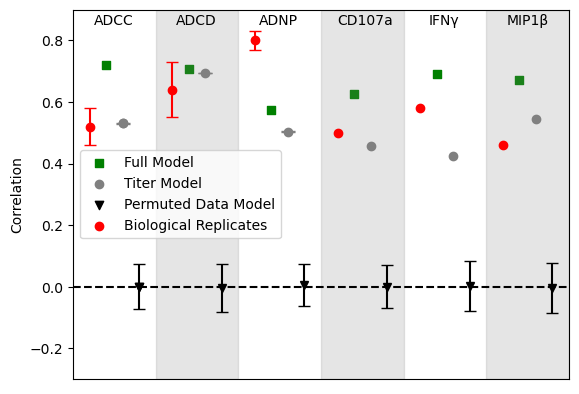

In [358]:
plt.scatter(2, np.mean(ADCCcorrcoefs), c = "green", marker = 's', label = 'Full Model');
plt.scatter(3, np.mean(ADCCiggccs), marker = 'o', color = 'gray', label = 'Titer Model');
plt.errorbar(3, np.mean(ADCCiggccs), yerr = np.std(ADCCiggccs), marker = 'o', mfc = 'gray', mec = 'gray', capsize = 5, ecolor = 'gray');
plt.scatter(7, np.mean(ADCDcorrcoefs), c = "green", marker = 's');
plt.errorbar(8, np.mean(ADCDiggccs), yerr = np.std(ADCDiggccs), marker = 'o', mfc = 'gray', mec = 'gray', capsize = 5, ecolor = 'gray');
plt.scatter(12, np.mean(ADNPcorrcoefs), c = "green", marker = 's');
plt.errorbar(13, np.mean(ADNPiggccs), yerr = np.std(ADNPiggccs), marker = 'o', mfc = 'gray', mec = 'gray', capsize = 5, ecolor = 'gray');
plt.scatter(17, np.mean(CD107acorrcoefs), c = "green", marker = 's');
plt.scatter(18, np.mean(CD107aiggccs), c = "gray");
plt.scatter(22, np.mean(IFNycorrcoefs), c = "green", marker = 's');
plt.scatter(23, np.mean(IFNyiggccs), c = "gray");
plt.scatter(27, np.mean(MIP1bcorrcoefs), c = "green", marker = 's');
plt.scatter(28, np.mean(MIP1biggccs), c = "gray");
plt.axhline(y = 0, linestyle = 'dashed', c = 'k');
plt.ylim(-.3, 0.9);
plt.ylabel('Correlation')
plt.xlim(0, 30);
plt.xticks([]);
plt.axvspan(5, 10, color = 'gray', alpha = 0.2);
plt.axvspan(15, 20, color = 'gray', alpha = 0.2);
plt.axvspan(25, 30, color = 'gray', alpha = 0.2);
plt.text(1.25, 0.85, 'ADCC');
plt.text(6.25, 0.85, 'ADCD');
plt.text(11.25, 0.85, 'ADNP');
plt.text(16, 0.85, 'CD107a');
plt.text(21.5, 0.85, 'IFNγ');
plt.text(26.25, 0.85, 'MIP1β');
plt.scatter(4, np.mean(ADCCpermccs), marker = 'v', c = 'k', label = 'Permuted Data Model');
plt.errorbar(4, np.mean(ADCCpermccs), yerr = np.std(ADCCpermccs), marker = 'v', mfc = 'k', mec = 'k', capsize = 4, ecolor = 'k');
plt.errorbar(9, np.mean(ADCDpermccs), yerr = np.std(ADCDpermccs), marker = 'v', mfc = 'k', mec = 'k', capsize = 4, ecolor = 'k');
plt.errorbar(14, np.mean(ADNPpermccs), yerr = np.std(ADNPpermccs), marker = 'v', mfc = 'k', mec = 'k', capsize = 4, ecolor = 'k');
plt.errorbar(19, np.mean(CD107apermccs), yerr = np.std(CD107apermccs), marker = 'v', mfc = 'k', mec = 'k', capsize = 4, ecolor = 'k');
plt.errorbar(24, np.mean(IFNypermccs), yerr = np.std(IFNypermccs), marker = 'v', mfc = 'k', mec = 'k', capsize = 4, ecolor = 'k');
plt.errorbar(29, np.mean(MIP1bpermccs), yerr = np.std(MIP1bpermccs), marker = 'v', mfc = 'k', mec = 'k', capsize = 4, ecolor = 'k');
plt.errorbar(1, 0.52, yerr = .06, marker = 'o', mfc = 'r', mec = 'r', capsize = 4, ecolor = 'r');
plt.errorbar(6, 0.64, yerr = .09, marker = 'o', mfc = 'r', mec = 'r', capsize = 4, ecolor = 'r');
plt.errorbar(11, 0.8, yerr = .03, marker = 'o', mfc = 'r', mec = 'r', capsize = 4, ecolor = 'r');
plt.scatter(16, 0.5, c = 'r', label = 'Biological Replicates');
plt.scatter(21, 0.58, c = 'r');
plt.scatter(26, 0.46, c = 'r');
plt.legend();

Figure 5B - IFNy predicted vs observed with last replicate used as representative model
Subjects color coded by class, with best fit line for each class

0.4706237714133156
0.6919208628047738


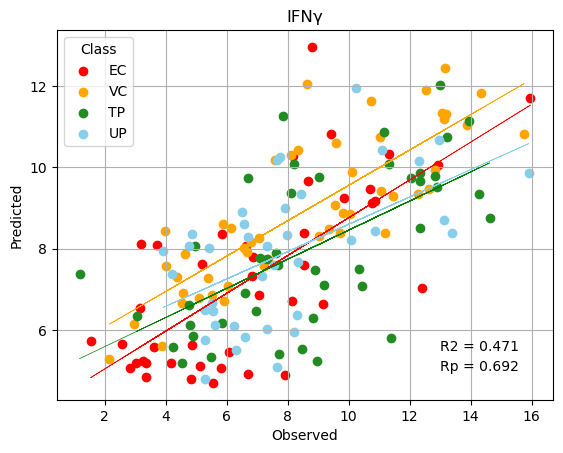

In [330]:
plt.scatter(Yuse[:42, 4], IFNypredrep[:42], color = 'r', label = 'EC');
plt.scatter(Yuse[42:92, 4], IFNypredrep[42:92], color = 'orange', label = 'VC');
plt.scatter(Yuse[92:135, 4], IFNypredrep[92:135], color = 'forestgreen', label = 'TP');
plt.scatter(Yuse[135:175, 4], IFNypredrep[135:175], color = 'skyblue', label = 'UP');

a, b = np.polyfit(Yuse[:42, 4], IFNypredrep[:42], 1);
plt.plot(Yuse[:42, 4], a*Yuse[:42, 4] + b, color = 'r', linewidth = 0.5);

a2, b2 = np.polyfit(Yuse[42:92, 4], IFNypredrep[42:92], 1);
plt.plot(Yuse[42:92, 4], a2*Yuse[42:92, 4] + b2, color = 'orange', linewidth = 0.5);

a3, b3 = np.polyfit(Yuse[92:135, 4], IFNypredrep[92:135], 1);
plt.plot(Yuse[92:135, 4], a3*Yuse[92:135, 4] + b3, color = 'green', linewidth = 0.5);

a4, b4 = np.polyfit(Yuse[135:175, 4], IFNypredrep[135:175], 1);
plt.plot(Yuse[135:175, 4], a4*Yuse[135:175, 4] + b4, color = 'skyblue', linewidth = 0.5);

plt.legend(title = 'Class');
plt.text(13, 5.5, "R2 = 0.471")
plt.text(13, 5, "Rp = 0.692")
plt.title("IFNγ");
plt.xlabel("Observed");
plt.ylabel("Predicted");
plt.grid();

print(sklearn.metrics.r2_score(Yuse[:, 4], IFNypredrep));
print(np.corrcoef(Yuse[:, 4], IFNypredrep)[1, 0]);
